<a href="https://colab.research.google.com/github/Rin-niee/MachineLearning/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Загрузка библиотек и предобработка данных**

In [ ]:
!pip install pandas scikit-learn seaborn scipy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.feature_selection import SelectKBest, chi2, RFE, SelectFromModel

In [ ]:
df = pd.read_csv('/content/heart.csv')

In [ ]:
df

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH
0,42,1,110,65,64,147,291,2,8,4,120,78,271,146,2,1
1,53,1,130,72,69,167,278,1,6,2,122,68,250,165,9,1
2,53,2,120,90,70,222,342,4,8,1,132,90,304,223,2,1
3,48,4,120,80,72,229,239,4,8,2,118,68,209,227,3,1
4,53,3,118,74,66,134,243,3,8,5,118,56,261,138,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115,80,66,148,300,2,8,1,115,65,273,152,0,0
196,23,1,110,70,69,137,120,3,8,2,112,76,198,153,0,0
197,20,3,130,80,66,150,210,5,0,1,130,85,274,158,0,0
198,46,3,140,84,66,138,130,4,6,2,148,88,160,157,0,0


In [ ]:
df['risk_group']= np.where(df['IHD_DX']<=5, 1, 0)
df.risk_group = df.risk_group.astype('category')
df

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH,risk_group
0,42,1,110,65,64,147,291,2,8,4,120,78,271,146,2,1,1
1,53,1,130,72,69,167,278,1,6,2,122,68,250,165,9,1,0
2,53,2,120,90,70,222,342,4,8,1,132,90,304,223,2,1,1
3,48,4,120,80,72,229,239,4,8,2,118,68,209,227,3,1,1
4,53,3,118,74,66,134,243,3,8,5,118,56,261,138,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115,80,66,148,300,2,8,1,115,65,273,152,0,0,1
196,23,1,110,70,69,137,120,3,8,2,112,76,198,153,0,0,1
197,20,3,130,80,66,150,210,5,0,1,130,85,274,158,0,0,1
198,46,3,140,84,66,138,130,4,6,2,148,88,160,157,0,0,1


In [ ]:
df[['MD_50', 'SES', 'CL_STATUS', 'MD_62', 'IHD_DX', 'DEATH', 'risk_group']] = df[['MD_50', 'SES', 'CL_STATUS', 'MD_62', 'IHD_DX', 'DEATH', 'risk_group']].astype({'MD_50':'category', 'SES':'category', 'CL_STATUS':'category', 'MD_62':'category', 'IHD_DX':'category', 'DEATH':'category', 'risk_group':'category'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   AGE_50      200 non-null    int64   
 1   MD_50       200 non-null    category
 2   SBP_50      200 non-null    int64   
 3   DBP_50      200 non-null    int64   
 4   HT_50       200 non-null    int64   
 5   WT_50       200 non-null    int64   
 6   CHOL_50     200 non-null    int64   
 7   SES         200 non-null    category
 8   CL_STATUS   200 non-null    category
 9   MD_62       200 non-null    category
 10  SBP_62      200 non-null    int64   
 11  DBP_62      200 non-null    int64   
 12  CHOL_62     200 non-null    int64   
 13  WT_62       200 non-null    int64   
 14  IHD_DX      200 non-null    category
 15  DEATH       200 non-null    category
 16  risk_group  200 non-null    category
dtypes: category(7), int64(10)
memory usage: 18.7 KB


In [ ]:
Y = df['risk_group']
X = df.drop('risk_group', axis =1)
X = X.drop('IHD_DX', axis =1)
X = X.drop('DEATH', axis =1)
df

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH,risk_group
0,42,1,110,65,64,147,291,2,8,4,120,78,271,146,2,1,1
1,53,1,130,72,69,167,278,1,6,2,122,68,250,165,9,1,0
2,53,2,120,90,70,222,342,4,8,1,132,90,304,223,2,1,1
3,48,4,120,80,72,229,239,4,8,2,118,68,209,227,3,1,1
4,53,3,118,74,66,134,243,3,8,5,118,56,261,138,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115,80,66,148,300,2,8,1,115,65,273,152,0,0,1
196,23,1,110,70,69,137,120,3,8,2,112,76,198,153,0,0,1
197,20,3,130,80,66,150,210,5,0,1,130,85,274,158,0,0,1
198,46,3,140,84,66,138,130,4,6,2,148,88,160,157,0,0,1


# **2. Масштабирование признаков**

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   AGE_50     200 non-null    int64   
 1   MD_50      200 non-null    category
 2   SBP_50     200 non-null    int64   
 3   DBP_50     200 non-null    int64   
 4   HT_50      200 non-null    int64   
 5   WT_50      200 non-null    int64   
 6   CHOL_50    200 non-null    int64   
 7   SES        200 non-null    category
 8   CL_STATUS  200 non-null    category
 9   MD_62      200 non-null    category
 10  SBP_62     200 non-null    int64   
 11  DBP_62     200 non-null    int64   
 12  CHOL_62    200 non-null    int64   
 13  WT_62      200 non-null    int64   
dtypes: category(4), int64(10)
memory usage: 17.5 KB


In [ ]:
X_processed = X.copy()
category_columns: list[str] = X_processed.select_dtypes(include=['category']).columns # собираем колонки помеченные как category
# Применяем One-Hot Encoding
#!!!!
X_processed = pd.get_dummies(X_processed, columns=category_columns,drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.


In [ ]:
X_processed

,AGE_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SBP_62,DBP_62,CHOL_62,WT_62,...,CL_STATUS_3,CL_STATUS_4,CL_STATUS_5,CL_STATUS_6,CL_STATUS_7,CL_STATUS_8,MD_62_2,MD_62_3,MD_62_4,MD_62_5
0,42,110,65,64,147,291,120,78,271,146,...,False,False,False,False,False,True,False,False,True,False
1,53,130,72,69,167,278,122,68,250,165,...,False,False,False,True,False,False,True,False,False,False
2,53,120,90,70,222,342,132,90,304,223,...,False,False,False,False,False,True,False,False,False,False
3,48,120,80,72,229,239,118,68,209,227,...,False,False,False,False,False,True,True,False,False,False
4,53,118,74,66,134,243,118,56,261,138,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,115,80,66,148,300,115,65,273,152,...,False,False,False,False,False,True,False,False,False,False
196,23,110,70,69,137,120,112,76,198,153,...,False,False,False,False,False,True,True,False,False,False
197,20,130,80,66,150,210,130,85,274,158,...,False,False,False,False,False,False,False,False,False,False
198,46,140,84,66,138,130,148,88,160,157,...,False,False,False,True,False,False,True,False,False,False


In [ ]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['int64']).columns.tolist()

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию(???)
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])


In [ ]:
X_processed

,AGE_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SBP_62,DBP_62,CHOL_62,WT_62,...,CL_STATUS_3,CL_STATUS_4,CL_STATUS_5,CL_STATUS_6,CL_STATUS_7,CL_STATUS_8,MD_62_2,MD_62_3,MD_62_4,MD_62_5
0,0.448980,0.180328,0.264706,0.214286,0.279412,0.412048,0.31250,0.318841,0.576419,0.275362,...,False,False,False,False,False,True,False,False,True,False
1,0.673469,0.344262,0.333333,0.571429,0.426471,0.380723,0.32500,0.173913,0.484716,0.413043,...,False,False,False,True,False,False,True,False,False,False
2,0.673469,0.262295,0.509804,0.642857,0.830882,0.534940,0.38750,0.492754,0.720524,0.833333,...,False,False,False,False,False,True,False,False,False,False
3,0.571429,0.262295,0.411765,0.785714,0.882353,0.286747,0.30000,0.173913,0.305677,0.862319,...,False,False,False,False,False,True,True,False,False,False
4,0.673469,0.245902,0.352941,0.357143,0.183824,0.296386,0.30000,0.000000,0.532751,0.217391,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.612245,0.221311,0.411765,0.357143,0.286765,0.433735,0.28125,0.130435,0.585153,0.318841,...,False,False,False,False,False,True,False,False,False,False
196,0.061224,0.180328,0.313725,0.571429,0.205882,0.000000,0.26250,0.289855,0.257642,0.326087,...,False,False,False,False,False,True,True,False,False,False
197,0.000000,0.344262,0.411765,0.357143,0.301471,0.216867,0.37500,0.420290,0.589520,0.362319,...,False,False,False,False,False,False,False,False,False,False
198,0.530612,0.426230,0.450980,0.357143,0.213235,0.024096,0.48750,0.463768,0.091703,0.355072,...,False,False,False,True,False,False,True,False,False,False


# **3. Очистка данных и удаление выбросов**

**Определение функции обучения с оценкой принадлежности к группе риска**

In [ ]:
from sklearn.model_selection import cross_val_score

def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model


In [ ]:
train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.8688
Точность на тестовой выборке: 0.8500

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.87      0.97      0.92        35

    accuracy                           0.85        40
   macro avg       0.44      0.49      0.46        40
weighted avg       0.76      0.85      0.80        40



LogisticRegression(max_iter=1000)

# **Метод 1: удаление на основе медианы**

In [ ]:
# Функция для удаления выбросов на основе межквартильного размаха (1.5 IQR)
def remove_outliers_based_on_iqr(X, y, iqr_multiplier=1.5):
    # Убедимся, что работаем только с числовыми данными
    X_numeric = X.select_dtypes(include=['number'])

    # Рассчитываем первый и третий квартили для каждой числовой переменной
    Q1 = X_numeric.quantile(0.25)
    Q3 = X_numeric.quantile(0.75)

    # Вычисляем межквартильный размах (IQR)
    IQR = Q3 - Q1

    # Оставляем только те значения, которые находятся в диапазоне [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
    X_filtered = X_numeric[~((X_numeric < (Q1 - iqr_multiplier * IQR)) | (X_numeric > (Q3 + iqr_multiplier * IQR))).any(axis=1)]

    # Синхронизируем y с отфильтрованными X
    y_filtered = y.loc[X_filtered.index]

    return X_filtered, y_filtered


In [ ]:
X_iqr, y_iqr = remove_outliers_based_on_iqr(X_processed, Y, iqr_multiplier=3)

In [ ]:
X_processed.describe()

,AGE_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SBP_62,DBP_62,CHOL_62,WT_62
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.531939,0.300820,0.444902,0.511429,0.434375,0.332783,0.446750,0.417681,0.502489,0.430254
std,0.220668,0.148481,0.107848,0.197726,0.195879,0.133793,0.154105,0.185625,0.203099,0.199393
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.367347,0.180328,0.392157,0.357143,0.279412,0.240964,0.343750,0.289855,0.365721,0.295290
50%,0.551020,0.262295,0.411765,0.500000,0.411765,0.313253,0.425000,0.391304,0.491266,0.416667
75%,0.693878,0.344262,0.509804,0.642857,0.588235,0.421687,0.531250,0.492754,0.629913,0.572464
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_iqr.describe()

,AGE_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SBP_62,DBP_62,CHOL_62,WT_62
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,0.529675,0.294329,0.443177,0.513120,0.432173,0.329371,0.444356,0.416519,0.505213,0.429976
std,0.220174,0.134120,0.094428,0.199252,0.196737,0.125045,0.151993,0.186385,0.199783,0.201140
min,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.039301,0.000000
25%,0.367347,0.180328,0.392157,0.357143,0.279412,0.240964,0.342187,0.286232,0.370087,0.288043
50%,0.551020,0.262295,0.411765,0.535714,0.408088,0.313253,0.425000,0.376812,0.491266,0.416667
75%,0.678571,0.344262,0.509804,0.642857,0.582721,0.414458,0.531250,0.492754,0.629913,0.572464
max,1.000000,0.836066,0.754902,1.000000,1.000000,0.768675,1.000000,1.000000,1.000000,1.000000


In [ ]:
train_and_evaluate(X_iqr, y_iqr)

Точность на обучающей выборке: 0.8654
Точность на тестовой выборке: 0.8750

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.88      1.00      0.93        35

    accuracy                           0.88        40
   macro avg       0.44      0.50      0.47        40
weighted avg       0.77      0.88      0.82        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LogisticRegression(max_iter=1000)

**Анализ выводов**
Точность повысилась, что говорит о малом влиянии выбросов на модель или не присутствует нормальное распределение, данные ассиметричны

# **Метод 2: удаление на основе среднего**

In [ ]:
# Функция для удаления выбросов на основе среднего значения

def remove_outliers_based_on_mean(X, y, mean_multiplier=2):
    # Убедимся, что работаем только с числовыми данными
    X_numeric = X.select_dtypes(include=['number'])

    # Рассчитываем среднее значение и стандартное отклонение для каждой переменной
    mean_values = X_numeric.mean()
    std_values = X_numeric.std()

    # Устанавливаем верхний и нижний пороги на основе среднего значения и множителя стандартного отклонения
    lower_threshold = mean_values - mean_multiplier * std_values
    upper_threshold = mean_values + mean_multiplier * std_values

    # Фильтруем наблюдения, которые находятся в пределах этих порогов по всем признакам
    X_filtered = X_numeric[~((X_numeric < lower_threshold) | (X_numeric > upper_threshold)).any(axis=1)]

    # Синхронизируем y с отфильтрованными X
    y_filtered = y.loc[X_filtered.index]

    return X_filtered, y_filtered

In [ ]:
X_mean, y_mean = remove_outliers_based_on_mean(X_processed.copy(), Y.copy())

In [ ]:
X_processed.describe()

,AGE_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SBP_62,DBP_62,CHOL_62,WT_62
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.531939,0.300820,0.444902,0.511429,0.434375,0.332783,0.446750,0.417681,0.502489,0.430254
std,0.220668,0.148481,0.107848,0.197726,0.195879,0.133793,0.154105,0.185625,0.203099,0.199393
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.367347,0.180328,0.392157,0.357143,0.279412,0.240964,0.343750,0.289855,0.365721,0.295290
50%,0.551020,0.262295,0.411765,0.500000,0.411765,0.313253,0.425000,0.391304,0.491266,0.416667
75%,0.693878,0.344262,0.509804,0.642857,0.588235,0.421687,0.531250,0.492754,0.629913,0.572464
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_mean.describe()

,AGE_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SBP_62,DBP_62,CHOL_62,WT_62
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.531183,0.274848,0.430550,0.513487,0.405954,0.324796,0.428934,0.398196,0.495954,0.398804
std,0.200339,0.110814,0.083331,0.179014,0.169331,0.105606,0.126869,0.167650,0.170263,0.171084
min,0.102041,0.098361,0.254902,0.142857,0.088235,0.072289,0.187500,0.057971,0.131004,0.036232
25%,0.397959,0.180328,0.392157,0.428571,0.268382,0.240964,0.337500,0.275362,0.375546,0.278986
50%,0.551020,0.262295,0.411765,0.571429,0.389706,0.322892,0.406250,0.347826,0.489083,0.398551
75%,0.673469,0.344262,0.509804,0.642857,0.525735,0.408434,0.500000,0.492754,0.609170,0.514493
max,0.918367,0.590164,0.656863,0.857143,0.779412,0.585542,0.750000,0.782609,0.868996,0.760870


In [ ]:
train_and_evaluate(X_mean, y_mean)

Точность на обучающей выборке: 0.8421
Точность на тестовой выборке: 0.8621

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.86      1.00      0.93        25

    accuracy                           0.86        29
   macro avg       0.43      0.50      0.46        29
weighted avg       0.74      0.86      0.80        29



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LogisticRegression(max_iter=1000)

**Анализ выводов**
В отличие от избавления по медиане, точность модели стала немного ниже, что говорит о меньшем нормальном распределении

# **3. Методы отбора признаков**

**1. Filter методы**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
# Применяем SelectKBest для выбора 5 лучших признаков
selector = SelectKBest(score_func=f_regression, k=5)
X_kbest = selector.fit_transform(X_processed, Y)

In [ ]:
selector.scores_

array([6.89656978e-02, 6.21856357e-01, 2.04038314e+00, 2.57082855e-03,
       2.53761666e-01, 2.01751077e+00, 7.19615474e-02, 1.13067625e-01,
       3.60171802e-01, 9.32762209e-03, 8.67519614e-01, 9.01818252e-01,
       2.14431272e-01, 2.22063622e-02, 1.39094032e-01, 1.68302331e-01,
       1.69475353e+00, 9.60359281e-01, 6.58730769e+00, 6.58730769e+00,
       1.83857143e-01, 2.41238092e+00, 3.30847929e+00, 6.53338248e+00,
       1.57956153e+00, 1.10773192e-02, 1.12716867e+00])

In [ ]:
X_processed.columns

Index(['AGE_50', 'SBP_50', 'DBP_50', 'HT_50', 'WT_50', 'CHOL_50', 'SBP_62',
       'DBP_62', 'CHOL_62', 'WT_62', 'MD_50_2', 'MD_50_3', 'MD_50_4', 'SES_2',
       'SES_3', 'SES_4', 'SES_5', 'CL_STATUS_3', 'CL_STATUS_4', 'CL_STATUS_5',
       'CL_STATUS_6', 'CL_STATUS_7', 'CL_STATUS_8', 'MD_62_2', 'MD_62_3',
       'MD_62_4', 'MD_62_5'],
      dtype='object')

In [ ]:
X_processed

,AGE_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SBP_62,DBP_62,CHOL_62,WT_62,...,CL_STATUS_3,CL_STATUS_4,CL_STATUS_5,CL_STATUS_6,CL_STATUS_7,CL_STATUS_8,MD_62_2,MD_62_3,MD_62_4,MD_62_5
0,0.448980,0.180328,0.264706,0.214286,0.279412,0.412048,0.31250,0.318841,0.576419,0.275362,...,False,False,False,False,False,True,False,False,True,False
1,0.673469,0.344262,0.333333,0.571429,0.426471,0.380723,0.32500,0.173913,0.484716,0.413043,...,False,False,False,True,False,False,True,False,False,False
2,0.673469,0.262295,0.509804,0.642857,0.830882,0.534940,0.38750,0.492754,0.720524,0.833333,...,False,False,False,False,False,True,False,False,False,False
3,0.571429,0.262295,0.411765,0.785714,0.882353,0.286747,0.30000,0.173913,0.305677,0.862319,...,False,False,False,False,False,True,True,False,False,False
4,0.673469,0.245902,0.352941,0.357143,0.183824,0.296386,0.30000,0.000000,0.532751,0.217391,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.612245,0.221311,0.411765,0.357143,0.286765,0.433735,0.28125,0.130435,0.585153,0.318841,...,False,False,False,False,False,True,False,False,False,False
196,0.061224,0.180328,0.313725,0.571429,0.205882,0.000000,0.26250,0.289855,0.257642,0.326087,...,False,False,False,False,False,True,True,False,False,False
197,0.000000,0.344262,0.411765,0.357143,0.301471,0.216867,0.37500,0.420290,0.589520,0.362319,...,False,False,False,False,False,False,False,False,False,False
198,0.530612,0.426230,0.450980,0.357143,0.213235,0.024096,0.48750,0.463768,0.091703,0.355072,...,False,False,False,True,False,False,True,False,False,False


***!!!Допзадание***
⏰ Изучите 1 из методов и используйте его как score_func (Важно учитывать, что не все методы могут подходить под тип признака, например chi2 подходит только для категориальных)

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
X_supercoolfilter = SelectKBest(score_func=chi2, k=5)
X_kbest = selector.fit_transform(X_processed, Y)

****

In [ ]:
selector.get_support(indices=True)

array([18, 19, 21, 22, 23])

In [ ]:
# Получаем список отобранных признаков
selected_features = X_processed.columns[selector.get_support(indices=True)]
print("Отобранные признаки:", selected_features)

Отобранные признаки: Index(['CL_STATUS_4', 'CL_STATUS_5', 'CL_STATUS_7', 'CL_STATUS_8', 'MD_62_2'], dtype='object')


In [ ]:
# Преобразуем X_kbest в DataFrame
X_kbest_df = pd.DataFrame(X_kbest, columns=selected_features)

# Обучаем и оцениваем модель
train_and_evaluate(X_kbest_df, Y)

Точность на обучающей выборке: 0.8625
Точность на тестовой выборке: 0.8750

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.88      1.00      0.93        35

    accuracy                           0.88        40
   macro avg       0.44      0.50      0.47        40
weighted avg       0.77      0.88      0.82        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LogisticRegression(max_iter=1000)

***2. Wrapper методы***

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Инициализируем модель логистической регрессии
base_model = LogisticRegression(max_iter=1000)

# Инициализируем RFE для выбора 5 лучших признаков
rfe = RFE(estimator=base_model, n_features_to_select=5)
rfe.fit(X_processed, Y)

# Получаем список отобранных признаков
selected_features = X_processed.columns[rfe.support_]
print("Отобранные признаки:", selected_features)


Отобранные признаки: Index(['CHOL_50', 'SES_5', 'CL_STATUS_3', 'CL_STATUS_8', 'MD_62_2'], dtype='object')


In [ ]:
# Отбираем признаки
X_rfe = X_processed[selected_features]

# Обучаем и оцениваем модель
model = train_and_evaluate(X_rfe, Y)


Точность на обучающей выборке: 0.8625
Точность на тестовой выборке: 0.8750

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.88      1.00      0.93        35

    accuracy                           0.88        40
   macro avg       0.44      0.50      0.47        40
weighted avg       0.77      0.88      0.82        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


***3. Embedded методы***

Коэффициенты модели без регуляризации: [[ 1.95213662e-01  3.00330697e-02 -2.81545043e-01 -2.01387516e-01
  -1.29188563e-01 -5.13371063e-01  2.18757993e-04 -4.57114601e-02
  -2.91892718e-01 -3.27666060e-02 -8.77861881e-02  3.72088258e-01
   2.13700762e-01  1.45114146e-01  2.34128653e-01 -5.92724401e-02
   8.01162117e-01  5.37501869e-01 -4.88089514e-01 -4.96446430e-01
   1.85011832e-01 -4.20721960e-01  6.06919812e-01 -8.72623894e-01
   3.29208145e-01 -2.22357962e-01  5.51981043e-01]]
Коэффициенты модели с регуляризацией: [[ 0.10072653  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.28046671
   0.          0.          0.11277843  0.          0.73229077  0.22800047
   0.          0.          0.          0.          0.91467577 -0.71776625
   0.25990217  0.          0.        ]]
Отобранные признаки: Index(['AGE_50', 'MD_50_3', 'SES_3', 'SES_5', 'CL_STATUS_3', 'CL_STATUS_8',
       'MD_62_2', 'MD_62_3'],
      dtype='object'

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


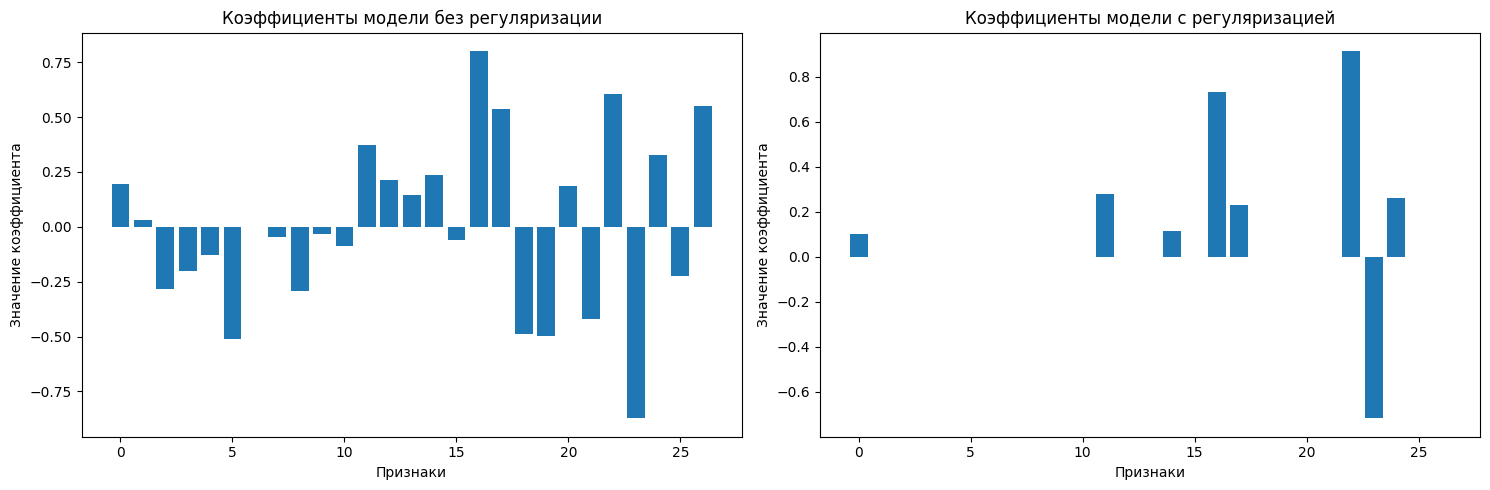

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import numpy as np
import matplotlib.pyplot as plt

# Обучаем модель без регуляризации
model_no_penalty = LogisticRegression(solver='lbfgs', max_iter=1000)
model_no_penalty.fit(X_processed, Y)

# Выводим коэффициенты модели без регуляризации
coefficients_no_penalty = model_no_penalty.coef_
print("Коэффициенты модели без регуляризации:", coefficients_no_penalty)

# Инициализируем модель с L1-регуляризацией
model_with_penalty = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

# Обучаем модель с регуляризацией
model_with_penalty.fit(X_processed, Y)

# Выводим коэффициенты модели с регуляризацией
coefficients_with_penalty = model_with_penalty.coef_
print("Коэффициенты модели с регуляризацией:", coefficients_with_penalty)

# Используем SelectFromModel для отбора признаков
selector = SelectFromModel(model_with_penalty, prefit=True)
X_embedded = selector.transform(X_processed)

# Получаем список отобранных признаков
selected_features = X_processed.columns[selector.get_support()]
print("Отобранные признаки:", selected_features)

# Обучаем модель на отобранных признаках
model_embedded = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model_embedded.fit(X_embedded, Y)

# Выводим коэффициенты модели после отбора признаков
coefficients_embedded = model_embedded.coef_
print("Коэффициенты модели после отбора признаков:", coefficients_embedded)

# Визуализация коэффициентов моделей
plt.figure(figsize=(15, 5))

# Коэффициенты модели без регуляризации
plt.subplot(1, 2, 1)
plt.bar(range(len(coefficients_no_penalty[0])), coefficients_no_penalty[0])
plt.title("Коэффициенты модели без регуляризации")
plt.xlabel("Признаки")
plt.ylabel("Значение коэффициента")

# Коэффициенты модели с регуляризацией
plt.subplot(1, 2, 2)
plt.bar(range(len(coefficients_with_penalty[0])), coefficients_with_penalty[0])
plt.title("Коэффициенты модели с регуляризацией")
plt.xlabel("Признаки")
plt.ylabel("Значение коэффициента")

plt.tight_layout()
plt.show()

In [ ]:
# Преобразуем X_embedded в DataFrame
X_embedded_df = pd.DataFrame(X_embedded, columns=selected_features)

# Обучаем и оцениваем модель
model = train_and_evaluate(X_embedded_df, Y)

Точность на обучающей выборке: 0.8688
Точность на тестовой выборке: 0.8750

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.88      1.00      0.93        35

    accuracy                           0.88        40
   macro avg       0.44      0.50      0.47        40
weighted avg       0.77      0.88      0.82        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


***!!! Допзадание***
### ⏰ **Проэксперементировать с разным количеством k, найти лучшую модель, объяснить результат**


In [ ]:
# Применяем SelectKBest для выбора 5 лучших признаков
selector = SelectKBest(score_func=f_regression, k=12)
X_kbest = selector.fit_transform(X_processed, Y)

In [ ]:
selector.scores_

array([6.89656978e-02, 6.21856357e-01, 2.04038314e+00, 2.57082855e-03,
       2.53761666e-01, 2.01751077e+00, 7.19615474e-02, 1.13067625e-01,
       3.60171802e-01, 9.32762209e-03, 8.67519614e-01, 9.01818252e-01,
       2.14431272e-01, 2.22063622e-02, 1.39094032e-01, 1.68302331e-01,
       1.69475353e+00, 9.60359281e-01, 6.58730769e+00, 6.58730769e+00,
       1.83857143e-01, 2.41238092e+00, 3.30847929e+00, 6.53338248e+00,
       1.57956153e+00, 1.10773192e-02, 1.12716867e+00])

In [ ]:
X_processed.columns

Index(['AGE_50', 'SBP_50', 'DBP_50', 'HT_50', 'WT_50', 'CHOL_50', 'SBP_62',
       'DBP_62', 'CHOL_62', 'WT_62', 'MD_50_2', 'MD_50_3', 'MD_50_4', 'SES_2',
       'SES_3', 'SES_4', 'SES_5', 'CL_STATUS_3', 'CL_STATUS_4', 'CL_STATUS_5',
       'CL_STATUS_6', 'CL_STATUS_7', 'CL_STATUS_8', 'MD_62_2', 'MD_62_3',
       'MD_62_4', 'MD_62_5'],
      dtype='object')

Вне зависимости от коэффициентов точность модели соврешенно не меняется. В коэффициентах от 1 до 12 никаких изменений в модели не наблюдается. В то же время более высокая точность модели достигается с использованием Embedded метода, на основе чего можно сделать вывод о более подходящего использования для базы.

### ⏰ **Изучить метод отбора ```SequentialFeatureSelector```, описать способ работы, сравнить результат с прошлыми методами и объяснить полученный результат**

Пошаговый метод для выбора наиболее важных признаков из набора данных с использованием жадного алгоритма(удаляет и добавляет признаки для формирования подмножества)
Работа:
(Вперед)
1. Пустое множество
2. На каждой итерации + влиятельный признак и так до конца набора
(назад)
1. Полный набор признаков
2. С каждой итерацией и до конца удаляются менее влиятельные

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42)

# Инициализируем модель логистической регрессии
model = LogisticRegression(max_iter=1000, solver='liblinear')

# Выбираем 5 лучших признаков
sfs = SequentialFeatureSelector(model, n_features_to_select=5, direction='forward', k=5)
sfs.fit(X_processed, Y)
selected_features = X_processed.columns[sfs.support_]
print("Отобранные признаки:", selected_features)

Отобранные признаки: Index(['AGE_50', 'SBP_50', 'DBP_50', 'HT_50', 'WT_50'], dtype='object')


In [ ]:
X_sfs = X_processed[selected_features]
model = train_and_evaluate(X_sfs, Y)

NameError: name 'precision_score' is not defined

## 4. Логистическая регрессия

In [141]:
import numpy as np

# Сигмоидная функция
def sigmoid(z):
    # Убедимся, что z это numpy массив
    return 1 / (1 + np.exp(-z))

# Простая реализация логистической регрессии
class OwnLogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    # Метод для обучения модели
    def fit(self, X, y):
        # Инициализация весов
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Градиентный спуск
        for idx_,_ in enumerate(range(self.iterations)):
            # Линейная комбинация
            linear_model = np.dot(X, self.weights) + self.bias
            # Применяем сигмоиду для предсказания
            y_pred = sigmoid(linear_model)

            # Вычисляем градиенты
            dw = (1 / len(X)) * np.dot(X.T, (y_pred - y))
            db = (1 / len(X)) * np.sum(y_pred - y)

            # Обновляем веса и смещение
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    # Метод для предсказания
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        print("regression",linear_model)
        y_pred = sigmoid(linear_model)
        print("sigmoid",y_pred)
        # Возвращаем метки классов (0 или 1)
        return [1 if i > 0.5 else 0 for i in y_pred]


In [142]:
# Пример использования
X = np.array([[0.1, 1.2], [1.1, 2.2], [2.1, 1.9], [1.0, 1.0]])
y = np.array([0, 1, 1, 0])

model = OwnLogisticRegression(learning_rate=0.1, iterations=1000)
model.fit(X, y)
predictions = model.predict(X)



regression [-2.48902698  1.89302513  3.0459193  -1.27754449]
sigmoid [0.07663102 0.86910007 0.95460602 0.2179685 ]


## 5: Кросс-валидация

In [143]:
# Импорт необходимых библиотек
import numpy as np
from sklearn.model_selection import KFold, ShuffleSplit, train_test_split, cross_val_score

In [149]:
# K-Fold Cross-Validation
def k_fold_cross_validation(X, y, n_splits=10):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []

    # Реализация K-Fold вручную
    for train_index, test_index in kf.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Обучение модели на тренировочной выборке
        model.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = model.predict(X_test)

        # Оценка точности
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Выводим среднюю точность и точности по каждому фолду
    print(f"K-Fold Cross-Validation - Средняя точность: {np.mean(accuracies)}")
    print(f"Точности по каждому фолду: {accuracies}")

# Пример использования:
k_fold_cross_validation(X = X_processed.to_numpy(), y = Y.to_numpy())


K-Fold Cross-Validation - Средняя точность: 0.86
Точности по каждому фолду: [0.95, 0.85, 0.85, 0.9, 0.75, 0.9, 0.8, 0.8, 0.85, 0.95]


***!!! Допзадание***
### ⏰ **Используем результат отбора признаков (выбираем по наилучшей точности), делаем кросс валидацию и объясняем результат + перебираем параметры n_splits**

На основе подбора можно сделать вывод, что чем выше деление на фолы, тем выше точность предсказания.
На основе отбора признаком можно сделать вывод, что наибольшее влияние на мдель сказывают признаки 1 и 10.

In [153]:
# ShuffleSplit Cross-Validation
def shuffle_split_cross_validation(X, y, n_splits=3, test_size=0.4):
    ss = ShuffleSplit(n_splits=n_splits, test_size=test_size)
    accuracies = []

    # Реализация ShuffleSplit вручную
    for train_index, test_index in ss.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Обучение модели на тренировочной выборке
        model.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = model.predict(X_test)

        # Оценка точности
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Выводим среднюю точность и точности по каждому разделению
    print(f"ShuffleSplit Cross-Validation - Средняя точность: {np.mean(accuracies)}")
    print(f"Точности по каждому разделению: {accuracies}")

# Пример использования:
shuffle_split_cross_validation(X_processed.to_numpy(), Y.to_numpy())


ShuffleSplit Cross-Validation - Средняя точность: 0.875
Точности по каждому разделению: [0.85, 0.875, 0.9]


***!!! Допзадание***
### ⏰ **Используем результат отсечения выбросов, делаем кросс валидацию и объясняем результат + перебираем параметры n_splits**

По результатам можно сделать вывод, что чем ниже разбиение на части, тем выше точность, наиболее высокий коэффициент точности наблюдается в делении под номером 3

In [160]:
# Train-Test-Validation Split
def train_test_validation_split(X, y):
    model = LogisticRegression(max_iter=1000)
    # Разделяем данные на тренировочные и оставшиеся (валидация + тест)
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.4, random_state=42)

    # Разделяем оставшиеся данные на валидационные и тестовые
    X_train_train, X_test, y_train_train, y_test = train_test_split(X_train, y_train, test_size=0.4, random_state=42)

    # Обучаем модель на тренировочных данных
    model.fit(X_train_train, y_train_train)

    # Оцениваем на валидационных данных
    y_valid_pred = model.predict(X_validation)
    validation_accuracy = accuracy_score(y_validation, y_valid_pred)
    print(f"Точность на валидационных данных: {validation_accuracy}")

    # Оцениваем на тестовых данных
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Точность на тестовых данных: {test_accuracy}")

# Пример использования:
train_test_validation_split(X_processed.to_numpy(), Y.to_numpy())


Точность на валидационных данных: 0.8875
Точность на тестовых данных: 0.8541666666666666


***!!!Допзадание***
### ⏰ **Используем результат отсечения выбросов или лучший отбор признаков, делаем кросс валидацию и объясняем результат + перебираем параметры n_splits**

т.к n_splits отсутствовал, было принято решение изменить параметры тестовой выборки, на основе чего был сделан вывод о падении точности валидационных тестов в зависимости от повышения параметра



!!!Допзадание
### ⏰ **Объяснить, какой из методов подходит для вашего датасета**

На основе сравнения точности моделей можно сделать вывод, что для выбранного датасета наиболее подходящим является k-fold, так как по сравнению с другими имеет немного более высокую точность